<a href="https://colab.research.google.com/github/caiomocny/MachineLearning-Convolution_Neural_Network_CNN/blob/main/Caio_Mocny_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# CNN - Convolution Neural Network

In [ ]:
# Libraries
import cv2
import numpy as np
import os
import random
import zipfile

from google.colab import files # COLAB
from matplotlib import image  as mpimg
from matplotlib import pyplot as plt
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing import image

In [ ]:
# COLAB - Dataset. The dataset contains 2000 images (Dogs and Cats), that are extracted from the Kaggle "Dogs vs. Cats" dataset (with 25000 images of Dogs and Cats)
!wget --no-check-certificate https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip -O /tmp/cats_and_dogs_filtered.zip

--2021-11-28 19:09:44--  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 173.194.210.128, 173.194.213.128, 173.194.215.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|173.194.210.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68606236 (65M) [application/zip]
Saving to: ‘/tmp/cats_and_dogs_filtered.zip’

/tmp/cats_and_dogs_ 100%[===================>]  65.43M   173MB/s    in 0.4s    

2021-11-28 19:09:45 (173 MB/s) - ‘/tmp/cats_and_dogs_filtered.zip’ saved [68606236/68606236]



In [ ]:
# Unzip Dataset
Zip = zipfile.ZipFile('/tmp/cats_and_dogs_filtered.zip', 'r')
Zip.extractall('/tmp')
Zip.close()

In [ ]:
# Check Unzipped Dataset
print(os.listdir('/tmp/cats_and_dogs_filtered'))

['train', 'validation', 'vectorize.py']


In [ ]:
# Check Unziped Dataset - 'train' Folder
print(os.listdir('/tmp/cats_and_dogs_filtered/train'))

['dogs', 'cats']


In [ ]:
# Check Unziped Dataset - 'validation' Folder
print(os.listdir('/tmp/cats_and_dogs_filtered/validation'))

['dogs', 'cats']


In [ ]:
# Preparing Dataset
# Train - Dogs
train_dogs_dir = '/tmp/cats_and_dogs_filtered/train/dogs'

# Train - Cats
train_cats_dir = '/tmp/cats_and_dogs_filtered/train/cats'

# Validation - Dogs
valid_dogs_dir = '/tmp/cats_and_dogs_filtered/validation/dogs'

# Directory with our validation dog pictures
valid_cats_dir = '/tmp/cats_and_dogs_filtered/validation/cats'

# Total Number of Images
print('Training Cat Images:'  , len(os.listdir(train_cats_dir)))
print('Training Dog Images:'  , len(os.listdir(train_dogs_dir)))
print('Validation Cat Images:', len(os.listdir(valid_cats_dir)))
print('Validation Dog Images:', len(os.listdir(valid_dogs_dir)))

Training Cat Images: 1000
Training Dog Images: 1000
Validation Cat Images: 500
Validation Dog Images: 500


In [ ]:
# File Names -  Train
train_dog_fnames = os.listdir(train_dogs_dir)
print(train_dog_fnames[:10])

train_cat_fnames = os.listdir(train_cats_dir)
print(train_cat_fnames[:10])

['dog.995.jpg', 'dog.555.jpg', 'dog.657.jpg', 'dog.586.jpg', 'dog.739.jpg', 'dog.856.jpg', 'dog.344.jpg', 'dog.483.jpg', 'dog.863.jpg', 'dog.107.jpg']
['cat.265.jpg', 'cat.508.jpg', 'cat.501.jpg', 'cat.3.jpg', 'cat.623.jpg', 'cat.129.jpg', 'cat.187.jpg', 'cat.836.jpg', 'cat.886.jpg', 'cat.966.jpg']


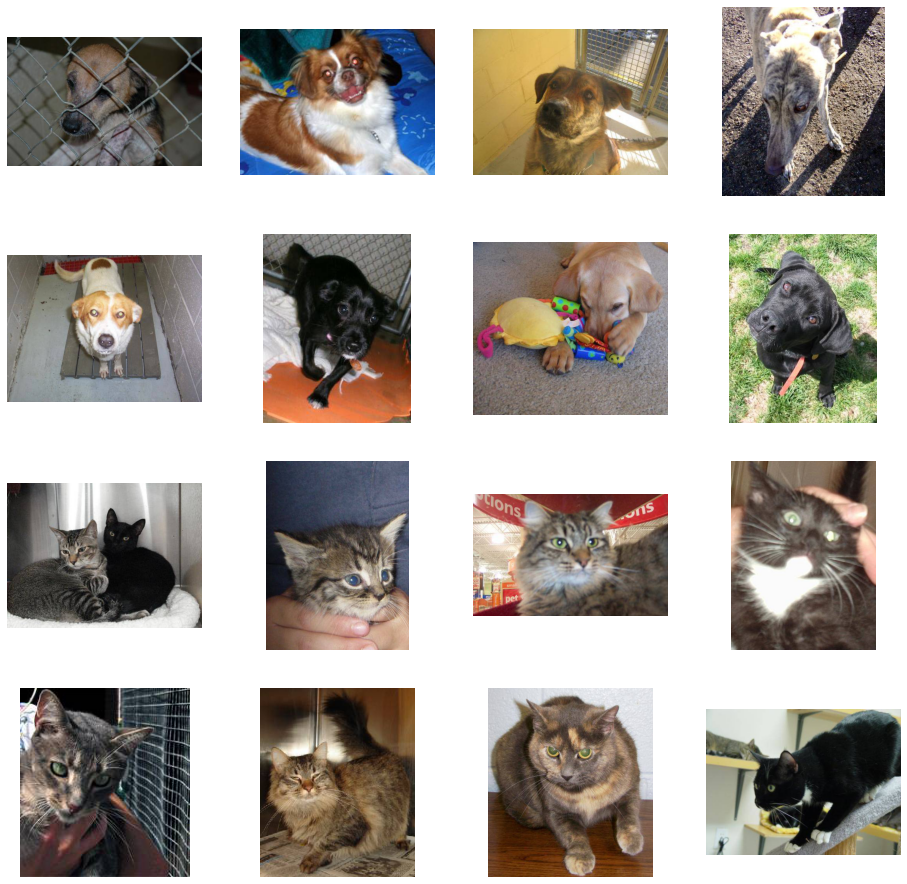

In [ ]:
# Plot Train Dataset - Parameters
nrows   = 4
ncols   = 4
index   = random.randint(0, len(os.listdir(train_cats_dir)) - (nrows + ncols))
index   = index + (nrows + ncols)
dog_pix = [os.path.join('/tmp/cats_and_dogs_filtered/train/dogs', fname) for fname in train_dog_fnames[index - (nrows + ncols):index]]
cat_pix = [os.path.join('/tmp/cats_and_dogs_filtered/train/cats', fname) for fname in train_cat_fnames[index - (nrows + ncols):index]]
fig     = plt.gcf()
fig.set_size_inches(ncols * 4, nrows * 4)

for i, img_path in enumerate(dog_pix + cat_pix):
  ax  = plt.subplot(nrows, ncols, i + 1) 
  img = mpimg.imread(img_path)
  ax.axis('Off')
  plt.imshow(img)
plt.show()

In [ ]:
# Get Image Size
dog = cv2.imread(dog_pix[0])
print(dog.shape)

(331, 500, 3)


In [ ]:
# Normalize Images
train_dir     = '/tmp/cats_and_dogs_filtered/train'
valid_dir     = '/tmp/cats_and_dogs_filtered/validation'
train_datagen = image.ImageDataGenerator(rescale = 1./255)
valid_datagen = image.ImageDataGenerator(rescale = 1./255)

# Generator - Parameters
width    = 64
height   = 64
channels = 3
classes  = 2
batch    = 32

# Generator - Flow
train_generator = train_datagen.flow_from_directory(train_dir, target_size = (width, height), batch_size = batch, class_mode = 'categorical')
valid_generator = valid_datagen.flow_from_directory(valid_dir, target_size = (width, height), batch_size = batch, class_mode = 'categorical')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [ ]:
# Convolutional Neural Networks - Model
inp = Input(shape = (width, height, channels))
x   = Conv2D(32,  (3, 3), activation = 'relu', padding = 'valid')(inp)
x   = MaxPooling2D(pool_size = (2,2))(x)
x   = Conv2D(64,  (3, 3), activation = 'relu', padding = 'valid')(x)
x   = MaxPooling2D(pool_size = (2,2))(x)
x   = Conv2D(128, (3, 3), activation = 'relu', padding = 'valid')(x)
x   = MaxPooling2D(pool_size = (2,2))(x)
x   = Flatten()(x)
x   = Dense(512, activation = 'relu'   )(x)
x   = Dropout(0.50)(x)
out = Dense(units  = classes, activation = 'softmax')(x)

cnn = Model(inputs = inp, outputs = out)
cnn.compile(loss = 'categorical_crossentropy', optimizer = RMSprop(lr = 0.001), metrics = ['acc'])
cnn.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 64, 64, 3)]       0         
                                                                 
 conv2d (Conv2D)             (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 31, 31, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 29, 29, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 14, 14, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 12, 12, 128)       73856 

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/rmsprop.py:130: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


In [ ]:
# Checkpoint
filepath       = 'cnn.hdf5'
checkpoint     = ModelCheckpoint(filepath, monitor = 'loss', verbose = 1, save_best_only = True, mode = 'min')
callbacks_list = [checkpoint]

In [ ]:
# Convolutional Neural Networks - Fit
cnn_history = cnn.fit(train_generator, callbacks = callbacks_list, epochs = 15, validation_data = valid_generator, shuffle = True)
cnn.load_weights('cnn.hdf5')

Epoch 1/15
63/63 [==============================] - ETA: 0s - loss: 0.7251 - acc: 0.5290
Epoch 00001: loss improved from inf to 0.72513, saving model to cnn.hdf5
63/63 [==============================] - 26s 384ms/step - loss: 0.7251 - acc: 0.5290 - val_loss: 0.6899 - val_acc: 0.5020
Epoch 2/15
63/63 [==============================] - ETA: 0s - loss: 0.6771 - acc: 0.5965
Epoch 00002: loss improved from 0.72513 to 0.67707, saving model to cnn.hdf5
63/63 [==============================] - 24s 375ms/step - loss: 0.6771 - acc: 0.5965 - val_loss: 0.6357 - val_acc: 0.6660
Epoch 3/15
63/63 [==============================] - ETA: 0s - loss: 0.6144 - acc: 0.6655
Epoch 00003: loss improved from 0.67707 to 0.61437, saving model to cnn.hdf5
63/63 [==============================] - 24s 379ms/step - loss: 0.6144 - acc: 0.6655 - val_loss: 0.5942 - val_acc: 0.6950
Epoch 4/15
63/63 [==============================] - ETA: 0s - loss: 0.5682 - acc: 0.7135
Epoch 00004: loss improved from 0.61437 to 0.56820,

Text(0.5, 1.0, 'Accuracy')

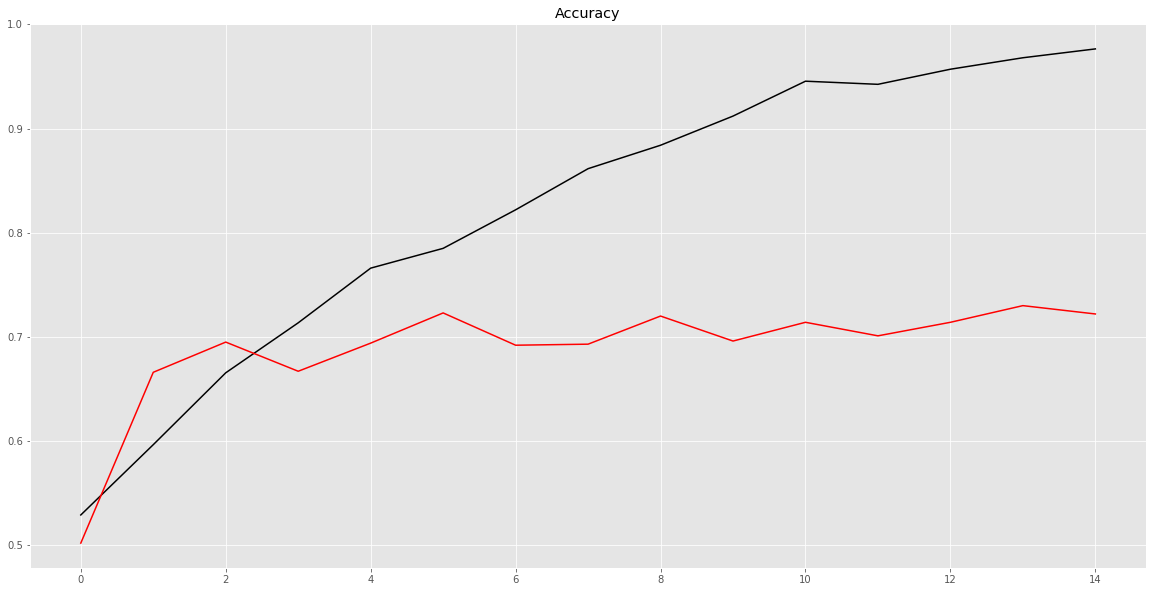

In [ ]:
# Plot Accuracy
acc     = cnn_history.history['acc']
val_acc = cnn_history.history['val_acc']
plt.style.use('ggplot')
plt.figure(figsize = [20, 10])
plt.plot(range(len(acc)), acc,     c = 'k')
plt.plot(range(len(acc)), val_acc, c = 'r')
plt.title('Accuracy')

Text(0.5, 1.0, 'Loss')

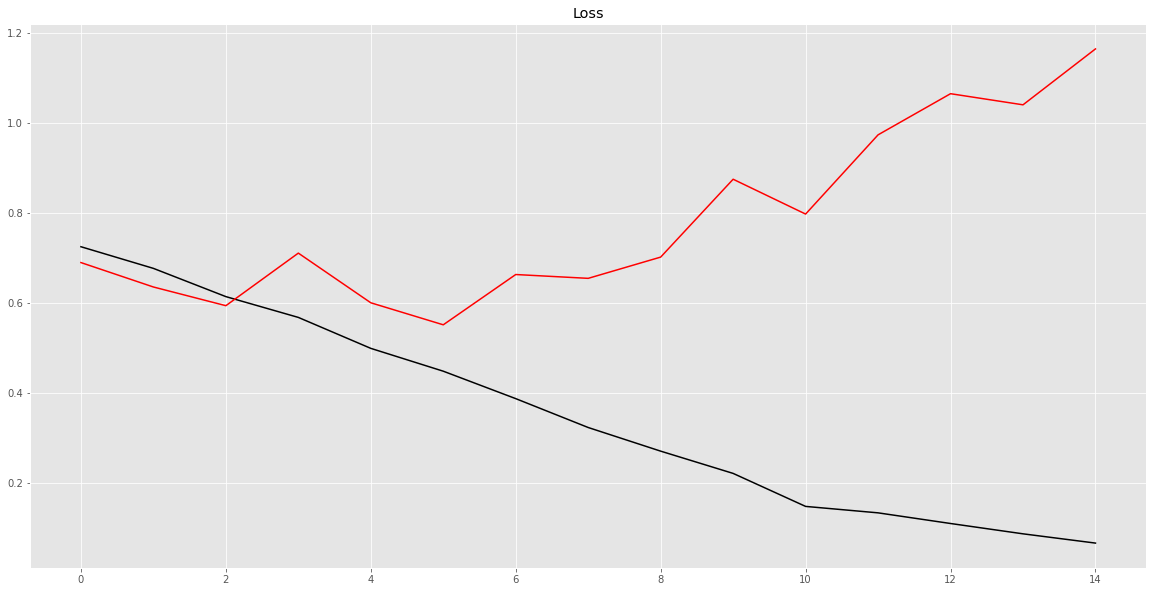

In [ ]:
# Plot Loss
loss     = cnn_history.history['loss']
val_loss = cnn_history.history['val_loss']
plt.style.use('ggplot')
plt.figure(figsize = [20, 10])
plt.plot(range(len(loss)), loss,     c = 'k')
plt.plot(range(len(loss)), val_loss, c = 'r')
plt.title('Loss')

In [ ]:
# COLAB - Prediction - Load Test Image
files.upload()

Class:  dog  ( [0. 1.] )


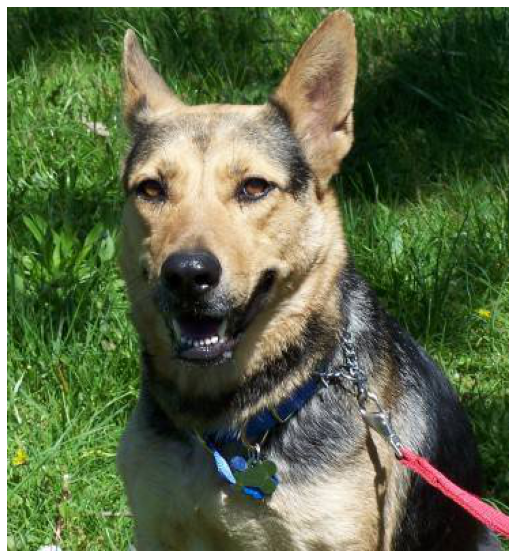

In [ ]:
# Prediction - Predict Test Image
file_path  = '/content/42.jpg'
test_image = image.load_img(file_path, target_size = (width, height))
test_image = image.img_to_array(test_image)
test_image = test_image/255.0
test_image = np.expand_dims(test_image, axis = 0)
#print(test_image.shape)
result     = cnn.predict(test_image)
class_val  = ['cat', 'dog']
fig        = plt.figure(figsize = [10, 10])
plt.axis('off')
plt.imshow(image.load_img(file_path))
print('Class: ', class_val[np.argmax(max(result))], ' (', np.round(result[0],2),')')

In [ ]:
# Working Directory
print(os.listdir())

In [ ]:
# COLAB - Download Weigths
files.download('cnn.hdf5')